In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [53]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)

In [61]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [57]:
df["Target"] = digits.target

In [59]:
df["Target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 640x480 with 0 Axes>

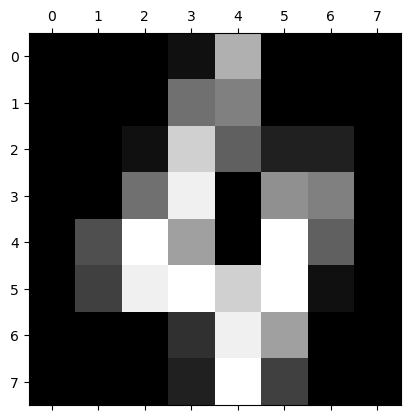

In [17]:
plt.gray()
plt.matshow(digits.data[4].reshape(8, 8))
plt.show()

In [158]:
# Independent Features
X = digits.data

# Dependent Features
Y = digits.target

In [160]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [162]:
print(Y)

[0 1 2 ... 8 9 8]


In [27]:
# generally standardise old data and divide the data to X and Y . but divided the data and then stndardised

In [164]:
X_df=df.drop('Target',axis=1)

In [166]:
X_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [168]:
Y_df=df['Target']

In [69]:
# Train and test data

In [190]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#x_train,x_test,y_train,y_test=train_test_split(X_df,Y_df,test_size=0.2)

In [105]:
df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
385,0.0,1.0,9.0,15.0,16.0,9.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,3
338,0.0,0.0,0.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,15.0,16.0,8.0,0.0,6
1265,0.0,1.0,8.0,12.0,16.0,16.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,7


In [194]:
sc=StandardScaler()

In [198]:
x_train=sc.fit_transform(x_train)  # learrns mean and std, the scales the data
#X_train_df=sc.fit_transform(X_df)


In [200]:
x_train.shape

(1437, 64)

In [202]:
x_test=sc.transform(x_train) #uses the mean and std from x_train,then scales the data

In [204]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.337904,-1.091416,-0.649132,0.734809,-0.678265,-0.407648,-0.122381,-0.055763,-0.626063,...,2.346648,6.154872,-0.026389,-0.301406,-1.086578,-1.144186,0.653379,1.583258,3.531256,3.302133
1,0.0,2.906429,1.416964,0.050295,0.500004,-0.325317,-0.407648,-0.122381,-0.055763,-0.311829,...,0.902921,-0.197451,-0.026389,1.765996,1.446284,0.894073,0.858829,1.583258,0.005958,-0.186959
2,0.0,0.743540,0.998901,0.749722,0.969615,1.262951,0.499616,-0.122381,-0.055763,0.945108,...,-0.747052,-0.197451,-0.026389,-0.301406,1.835955,0.214653,-0.990220,-1.144934,-0.497656,-0.186959
3,0.0,-0.337904,-1.091416,0.050295,-1.848053,-1.031214,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.747052,-0.197451,-0.026389,-0.301406,-1.086578,-0.238293,-0.579320,-1.144934,-0.497656,-0.186959
4,0.0,-0.337904,-1.091416,-0.649132,0.969615,-0.501791,-0.407648,-0.122381,-0.055763,-0.626063,...,-0.747052,-0.197451,-0.026389,-0.301406,-1.086578,-0.011820,0.037030,-1.144934,-0.497656,-0.186959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,0.743540,0.580838,0.516580,0.734809,-0.678265,-0.407648,-0.122381,-0.055763,0.002405,...,-0.540805,-0.197451,-0.026389,0.732295,0.666942,-0.011820,0.242480,0.389674,-0.497656,-0.186959
1433,0.0,1.824985,0.789869,0.749722,0.969615,1.615900,0.197195,-0.122381,-0.055763,2.830513,...,0.696674,-0.197451,-0.026389,-0.301406,1.251449,0.894073,0.653379,0.389674,-0.245849,-0.186959
1434,0.0,-0.337904,-0.046258,0.516580,0.500004,-0.678265,-0.407648,-0.122381,-0.055763,0.002405,...,-0.747052,-0.197451,-0.026389,-0.301406,0.666942,0.214653,-2.428370,-1.144934,-0.497656,-0.186959
1435,0.0,-0.337904,-0.255289,-0.415990,0.734809,1.792374,0.802037,-0.122381,-0.055763,-0.626063,...,-0.747052,-0.197451,-0.026389,-0.301406,0.082436,0.894073,-1.606570,-1.144934,-0.497656,-0.186959


In [184]:
y_train

array([6, 5, 3, ..., 7, 7, 8])

# Linear Discriminant Analysis (LDA) is used for classification problems, 
as it is a supervised machine learning technique designed to identify linear combinations of features 
that best separate different classes of data, making it suitable for
# multi-class classification tasks. 


In [132]:
# n_components = `min(no of features, no_of_classes - 1)`**

n Linear Discriminant Analysis (LDA), "n_components" refers to the number of new features you want to create by projecting your data onto a lower dimensional space, and the key point is that the maximum number of components you can extract is always one less than the number of classes in your dataset (n_classes - 1) because LDA aims to maximize class separation, meaning it can only find meaningful distinctions between classes up to that limit; essentially, it captures the most discriminative information between classes in the reduced dimensionality space. 
Key points about n_components in LDA:
Maximum value: The maximum value for n_components is always (n_classes - 1). 
Interpretation: Each "component" represents a new feature that is a linear combination of the original features, and these components are chosen to best separate the different classes in your data. 
Dimensionality reduction: By setting n_components to a value less than the maximum, you can significantly reduce the dimensionality of your data while still preserving important class information. 

In [206]:
# Object to LDA
LDA = LinearDiscriminantAnalysis(n_components = 9)

In [208]:
x_train.shape

(1437, 64)

In [210]:
x_train = LDA.fit_transform(x_train, y_train)

In [212]:
x_test = LDA.transform(x_test)

In [214]:
# New shape of x_train
x_train.shape

(1437, 9)

In [216]:
x_train.shape, x_test.shape

((1437, 9), (1437, 9))

In [218]:
model = RandomForestClassifier()

In [220]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [234]:
print(y_test.shape)
print(pred.shape)

(360,)
(1437,)


In [222]:
pred = model.predict(x_test)
pred

In [232]:
print(f"Accuracy Score: {accuracy_score(y_test, pred)}")

ValueError: Found input variables with inconsistent numbers of samples: [360, 1437]